In [1]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)

# Data Loading

[data] Telco Customer Churn (Kaggle)

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [2]:
file_path = "data/Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.8500,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.9500,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.0000,7043.0000,7043.0000
mean,0.1621,32.3711,64.7617
std,0.3686,24.5595,30.0900
min,0.0000,0.0000,18.2500
25%,0.0000,9.0000,35.5000
50%,0.0000,29.0000,70.3500
75%,0.0000,55.0000,89.8500
max,1.0000,72.0000,118.7500


# Preprocessing

### Type 확인

In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Target 확인

In [6]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
df["Churn"] = df["Churn"].map(
    {
        "Yes": 1,
        "No": 0,
    }
)

df["Churn"].unique()

array([0, 1])

### Dummy

In [8]:
df = pd.get_dummies(
    df.drop(["customerID"], axis=1),
    drop_first=True,
)

df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.8500,29.8500,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.9500,1889.5000,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.8500,108.1500,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.3000,1840.7500,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.7000,151.6500,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


### 결측치 

- 결측치가 있는지 확인 
- 확인되었다면 삭제를 우선 적용 
- 혹시 대안이 있다고 하면, 대표값으로 채움 

In [9]:
df.isnull().sum()

SeniorCitizen                             0
tenure                                    0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
StreamingTV_No internet service           0
StreamingTV_Yes                 

In [10]:
df.dropna(inplace=True)

df.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

## Correlation

In [11]:
# df.corr()
df_corr = df.corr()["Churn"].drop("Churn").sort_values(key=abs, ascending=False)
df_corr.head(10)

tenure                                 -0.3540
InternetService_Fiber optic             0.3075
Contract_Two year                      -0.3016
PaymentMethod_Electronic check          0.3015
StreamingMovies_No internet service    -0.2276
TechSupport_No internet service        -0.2276
DeviceProtection_No internet service   -0.2276
OnlineBackup_No internet service       -0.2276
OnlineSecurity_No internet service     -0.2276
InternetService_No                     -0.2276
Name: Churn, dtype: float64

In [12]:
top_10_features = df_corr.head(10).index.tolist()
top_10_corr = df[top_10_features + ["Churn"]].corr()

top_10_corr

,tenure,InternetService_Fiber optic,Contract_Two year,PaymentMethod_Electronic check,StreamingMovies_No internet service,TechSupport_No internet service,DeviceProtection_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,InternetService_No,Churn
tenure,1.0000,0.0179,0.5638,-0.2102,-0.0375,-0.0375,-0.0375,-0.0375,-0.0375,-0.0375,-0.3540
InternetService_Fiber optic,0.0179,1.0000,-0.2100,0.3358,-0.4657,-0.4657,-0.4657,-0.4657,-0.4657,-0.4657,0.3075
Contract_Two year,0.5638,-0.2100,1.0000,-0.2811,0.2175,0.2175,0.2175,0.2175,0.2175,0.2175,-0.3016
PaymentMethod_Electronic check,-0.2102,0.3358,-0.2811,1.0000,-0.2846,-0.2846,-0.2846,-0.2846,-0.2846,-0.2846,0.3015
StreamingMovies_No internet service,-0.0375,-0.4657,0.2175,-0.2846,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-0.2276
TechSupport_No internet service,-0.0375,-0.4657,0.2175,-0.2846,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-0.2276
DeviceProtection_No internet service,-0.0375,-0.4657,0.2175,-0.2846,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-0.2276
OnlineBackup_No internet service,-0.0375,-0.4657,0.2175,-0.2846,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-0.2276
OnlineSecurity_No internet service,-0.0375,-0.4657,0.2175,-0.2846,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-0.2276
InternetService_No,-0.0375,-0.4657,0.2175,-0.2846,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,-0.2276


<Axes: >

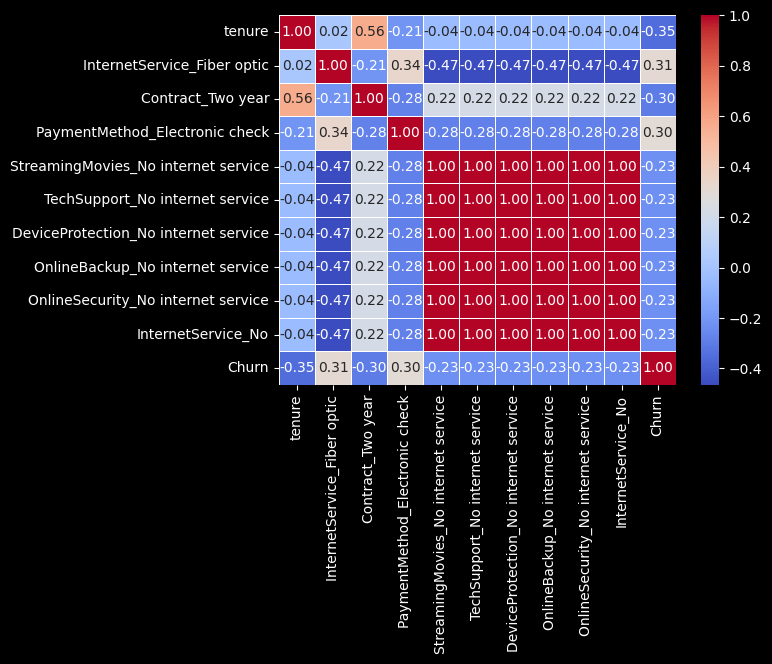

In [13]:
sns.heatmap(
    top_10_corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
)

<Axes: >

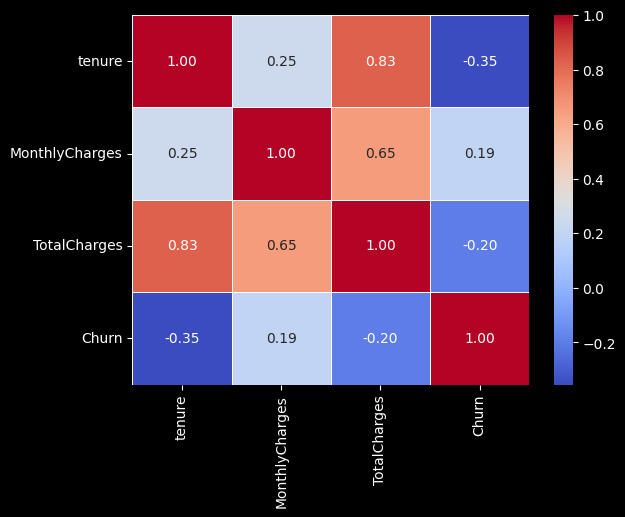

In [14]:
# Numeric 변수들만 선정해서 확인
sns.heatmap(
    df[["tenure", "MonthlyCharges", "TotalCharges", "Churn"]].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
)

# Machine Learning Classification

### Dataset Definition

In [15]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

## Modeling

(대상) Decision Tree, randomForest, SVM, XGB, LGBM

1. 위 알고리즘 중 가장 최적의 예측 성능을 보이는 알고리즘 확인
    - Decision Tree : max_depth = 5
    - SVM : kernel='rbf'
    - randomForest : n_estimators = 100, max_depth = 5
    - 현재 단계에서는 cross validation은 고려하지 않음  
2. 최적의 성능을 보이는 알고리즘의 feature importance 확인 
3. 최적의 모델에 대해서만 예측 성능 확인 (accuracy_score)
4. 위 과정에서 추가적으로 데이터 표준화 처리가 필요한지 검토

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
random_state = 42

#### 1. Models

In [19]:
models = {
    "DecisionTree": DecisionTreeClassifier(
        max_depth=5,
        random_state=random_state,
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=100,  
        max_depth=5,
        random_state=random_state,
    ),
    "SVM": Pipeline(
        [
            ('scaler', StandardScaler()), 
            ('svm', SVC(kernel='rbf', random_state=42))
        ]
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss", 
        random_state=random_state,
    ),
    "LGBM": LGBMClassifier(random_state=random_state),
}

In [20]:
best_model_name = None
best_accuracy = 0
best_model_instance = None

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_instance = model

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

DecisionTree Accuracy: 0.7754
RandomForest Accuracy: 0.7854
SVM Accuracy: 0.7811
XGBoost Accuracy: 0.7633
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
LGBM Accuracy: 0.7910

Best Model: LGBM with Accuracy: 0.7910


#### 2. Feature Importance

Best Model의 Feature Importance 확인 

In [22]:
if best_model_name in ["DecisionTree", "RandomForest", "XGBoost", "LGBM"]:
    feature_importances = best_model_instance.feature_importances_
    importance_df = pd.DataFrame(
        {"Feature": X.columns, "Importance": feature_importances}
    )
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    print(f"\nFeature Importance - {best_model_name}:")
    print(importance_df.head(10))
else:
    print(f"\n{best_model_name} does not support feature importance.")


Feature Importance - LGBM:
                           Feature  Importance
2                   MonthlyCharges         810
3                     TotalCharges         651
1                           tenure         473
4                      gender_Male         110
28  PaymentMethod_Electronic check          79
26            PaperlessBilling_Yes          78
15                OnlineBackup_Yes          65
13              OnlineSecurity_Yes          65
0                    SeniorCitizen          59
6                   Dependents_Yes          59


#### 3. Predict 

Best Model의 분류 성능 확인 

In [23]:
y_pred_best = best_model_instance.predict(X_test)
accuracy_score(y_test, y_pred_best)

0.7910447761194029

In [24]:
confusion_matrix(y_test, y_pred_best)

array([[925, 108],
       [186, 188]])

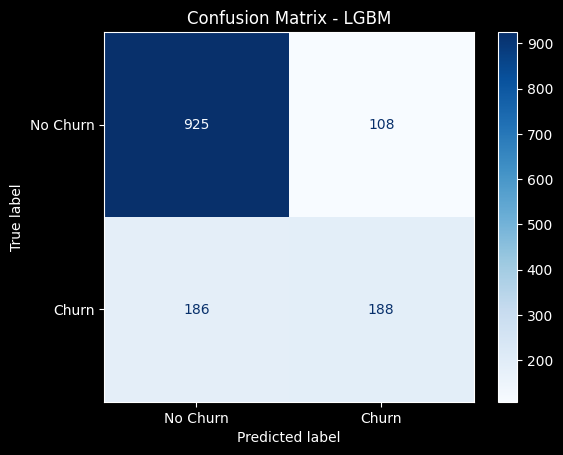

In [25]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])

disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

## 오분류 데이터 확인

In [26]:
misclassified_indices = y_test.index[y_test != y_pred_best]
misclassified_samples = X_test.loc[misclassified_indices].copy()
misclassified_samples['y_test'] = y_test.loc[misclassified_indices]
misclassified_samples['y_pred'] = y_pred_best[(y_test != y_pred_best).values]

misclassified_samples.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,y_test,y_pred
3469,1,15,91.5000,1400.3000,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,0,1
2173,0,4,86.0500,308.1000,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,0,1
1291,0,8,75.0000,632.9500,True,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,1,0
5194,0,22,89.4000,2001.5000,True,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True,False,True,False,1,0
1950,0,65,91.8500,5940.8500,True,True,False,True,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,1,0


-------------
** End of Docuemtns **